<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Multivariate Linear Regression
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 19</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    


The king wants you to:
- estimate the average life expectancy of his subjects. 
- speculate on what factors might be at play in determining the average life of his subject. 



WHO: compiled data across many countries
- socioeconomic data
- health data 
- average life expectancy. 

First task:

- Understand factors affecting life expectancy throughout the world
- Do this with multivariate linear regression.

Later task:

*Can we use this to help us with our problem in Zamunda?*

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import statsmodels.api as sm


import matplotlib.pyplot as plt


sns.set_context("notebook")
sns.set_palette("tab10")



WHO dataset contains data from 2000-2015 on average life expectancy and the prevalance of certain diseases (HIV, alcoholism, polio, etc.) and socioeconomic factors (GDP, schooling) across many different countries.

In [2]:
# load data
file_path = "Data/WHO_life.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Let's drop some columns that are too obviously correlated with the life expectancy (e.g., adult mortality, as an example). Also let's try and see if we can develop a robust relationship that is applicable  across country or country status. Let's also remove the year as a variable (data is over the past 15 years.

In [5]:
df = df.drop(columns = ['Adult Mortality', 'infant deaths', 'Year', 'Status', 'under-five deaths ', 'Country'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1   Alcohol                          2744 non-null   float64
 2   percentage expenditure           2938 non-null   float64
 3   Hepatitis B                      2385 non-null   float64
 4   Measles                          2938 non-null   int64  
 5    BMI                             2904 non-null   float64
 6   Polio                            2919 non-null   float64
 7   Total expenditure                2712 non-null   float64
 8   Diphtheria                       2919 non-null   float64
 9    HIV/AIDS                        2938 non-null   float64
 10  GDP                              2490 non-null   float64
 11  Population                       2286 non-null   float64
 12   thinness  1-19 year

I'm going to "clean" this by just dropping all nans

In [7]:
df = df.dropna()

Let's check it out. Should be no more NaNs.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  1649 non-null   float64
 1   Alcohol                          1649 non-null   float64
 2   percentage expenditure           1649 non-null   float64
 3   Hepatitis B                      1649 non-null   float64
 4   Measles                          1649 non-null   int64  
 5    BMI                             1649 non-null   float64
 6   Polio                            1649 non-null   float64
 7   Total expenditure                1649 non-null   float64
 8   Diphtheria                       1649 non-null   float64
 9    HIV/AIDS                        1649 non-null   float64
 10  GDP                              1649 non-null   float64
 11  Population                       1649 non-null   float64
 12   thinness  1-19 year

Now we are trying to model life expectancy linearly based on the other dependent factors:
- Life expectancy is our **target** (dependent variable).
- The rest are our:
    - predictors
    - features
    - covariates
    - independent variables.

Separate these and label them appropriately:
- X is now our **feature matrix**
- y is a vector of targets our outcomes.

In [9]:
X = df.drop(columns = ['Life expectancy '])
y = df['Life expectancy ']

In [10]:
X

,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Checking for collinearity through the correlation matrix

In [11]:
X.corr()

,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Alcohol,1.000000,0.417047,0.109889,-0.050110,0.353396,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.417047,1.000000,0.016760,-0.063071,0.242738,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.109889,0.016760,1.000000,-0.124800,0.143302,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.353396,0.242738,0.143302,-0.153245,1.000000,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
Polio,0.240315,0.128626,0.463331,-0.057850,0.186268,1.000000,0.119768,0.609245,-0.107885,0.156809,-0.045387,-0.164070,-0.174489,0.314682,0.350147
Total expenditure,0.214885,0.183872,0.113327,-0.113583,0.189469,0.119768,1.000000,0.129915,0.043101,0.180373,-0.079962,-0.209872,-0.217865,0.183653,0.243783
Diphtheria,0.242951,0.134813,0.588990,-0.058606,0.176295,0.609245,0.129915,1.000000,-0.117601,0.158438,-0.039898,-0.187242,-0.180952,0.343262,0.350398
HIV/AIDS,-0.027113,-0.095085,-0.094802,-0.003522,-0.210897,-0.107885,0.043101,-0.117601,1.000000,-0.108081,-0.027801,0.172592,0.183147,-0.248590,-0.211840
GDP,0.443433,0.959299,0.041850,-0.064768,0.266114,0.156809,0.180373,0.158438,-0.108081,1.000000,-0.020369,-0.277498,-0.277959,0.446856,0.467947


Hard to parse. Seaborn can help:

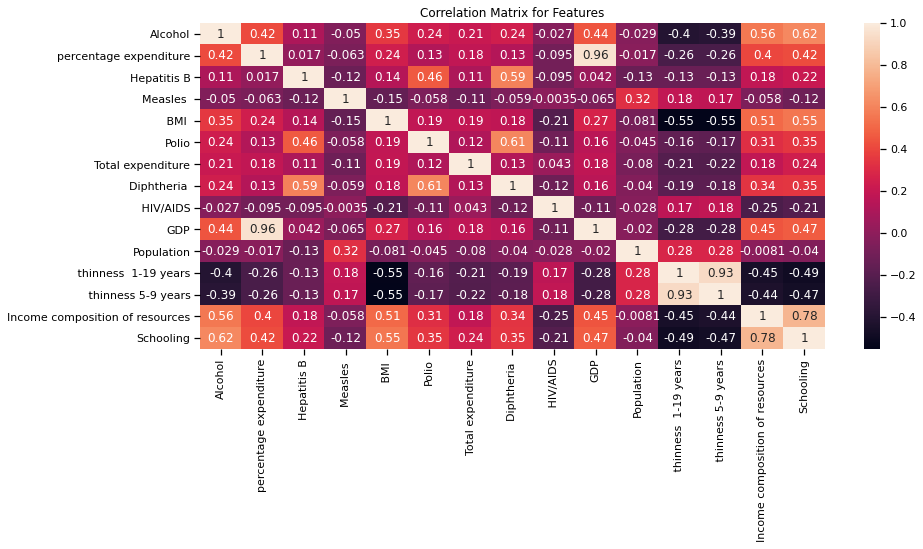

In [12]:
plt.figure(figsize=(14, 6))
sns.heatmap(X.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

Highly correlated variables:

- GDP vs percentage expenditure
- under five deaths vs population,
- income composition vs resources and schooling, 
- thinness 1-19 years vs thinness 5-9 years
- diptheria vs polio 


Getting rid of:
- percentage expenditure
- income composition of resources
- thinness 5-9 years
- diptheria. 

This can potentially help with issues of overfitting associated with multicollinearity that we addressed before.

In [13]:
X = X.drop(columns = ['percentage expenditure', 'Income composition of resources', ' thinness 5-9 years', 'Diphtheria ' ])
X.head()

,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,0.01,65.0,1154,19.1,6.0,8.16,0.1,584.259210,33736494.0,17.2,10.1
1,0.01,62.0,492,18.6,58.0,8.18,0.1,612.696514,327582.0,17.5,10.0
2,0.01,64.0,430,18.1,62.0,8.13,0.1,631.744976,31731688.0,17.7,9.9
3,0.01,67.0,2787,17.6,67.0,8.52,0.1,669.959000,3696958.0,17.9,9.8
4,0.01,68.0,3013,17.2,68.0,7.87,0.1,63.537231,2978599.0,18.2,9.5


Let's look at the correlation matrix now:

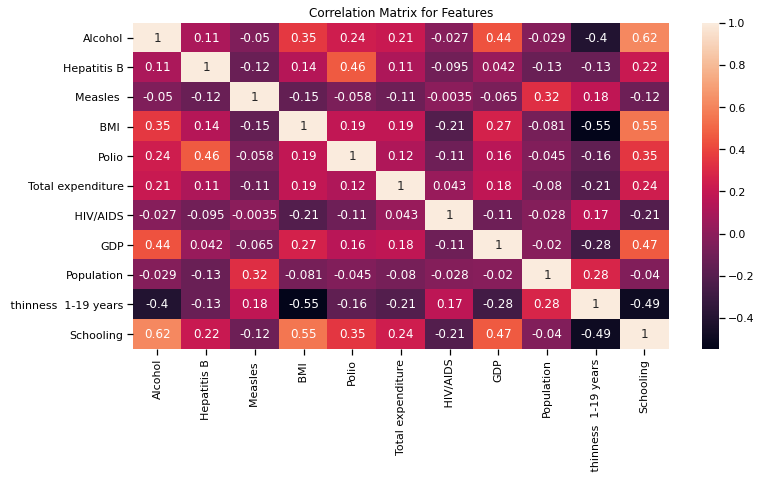

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(X.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat_2.jpg", dpi = 300)
plt.show()

Since, the correlation heatmap is symmetric:
- Often useful to make a triangular mask and filter.

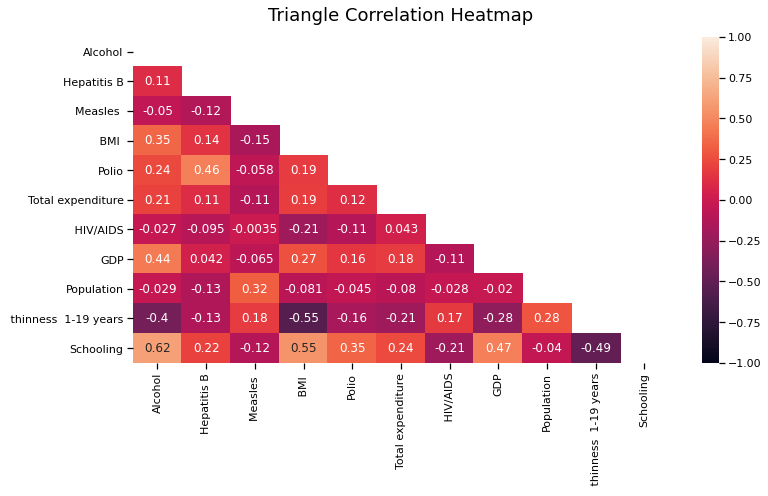

In [15]:
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
heatmap = sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Alcohol                1649 non-null   float64
 1   Hepatitis B            1649 non-null   float64
 2   Measles                1649 non-null   int64  
 3    BMI                   1649 non-null   float64
 4   Polio                  1649 non-null   float64
 5   Total expenditure      1649 non-null   float64
 6    HIV/AIDS              1649 non-null   float64
 7   GDP                    1649 non-null   float64
 8   Population             1649 non-null   float64
 9    thinness  1-19 years  1649 non-null   float64
 10  Schooling              1649 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 154.6 KB


Let's model this using statsmodels:

- Code is the exact same as simple linear regression

In [17]:
# need this for the bias term (the constant)
X_augmented = sm.add_constant(X)
X_augmented

,const,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,1.0,0.01,65.0,1154,19.1,6.0,8.16,0.1,584.259210,33736494.0,17.2,10.1
1,1.0,0.01,62.0,492,18.6,58.0,8.18,0.1,612.696514,327582.0,17.5,10.0
2,1.0,0.01,64.0,430,18.1,62.0,8.13,0.1,631.744976,31731688.0,17.7,9.9
3,1.0,0.01,67.0,2787,17.6,67.0,8.52,0.1,669.959000,3696958.0,17.9,9.8
4,1.0,0.01,68.0,3013,17.2,68.0,7.87,0.1,63.537231,2978599.0,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,4.36,68.0,31,27.1,67.0,7.13,33.6,454.366654,12777511.0,9.4,9.2
2934,1.0,4.06,7.0,998,26.7,7.0,6.52,36.7,453.351155,12633897.0,9.8,9.5
2935,1.0,4.43,73.0,304,26.3,73.0,6.53,39.8,57.348340,125525.0,1.2,10.0
2936,1.0,1.72,76.0,529,25.9,76.0,6.16,42.1,548.587312,12366165.0,1.6,9.8


In [18]:
results = sm.OLS(y, X_augmented).fit()

Get the slopes for each variable and the constant term:

In [19]:
results.params

const                    4.751520e+01
Alcohol                 -1.106528e-01
Hepatitis B             -4.152893e-04
Measles                  2.067782e-05
 BMI                     5.474011e-02
Polio                    2.755880e-02
Total expenditure        9.030953e-02
 HIV/AIDS               -6.345569e-01
GDP                      9.876450e-05
Population               1.037370e-09
 thinness  1-19 years   -9.933873e-02
Schooling                1.528351e+00
dtype: float64

Get the $R^2$ value.

In [20]:
results.rsquared

0.7630369259261873

Is this good or bad?

In multiple linear regression,  **adjusted** $R^2$ can be useful:

- Clearly penalizes you for using more variables.
- Consequence of adding a useless feature:
    - $R^2$ the same
    - **adjusted** $R^2$ drops.

$$ R^2 = 1 - \frac{ \sum_i (y_i - \hat{y}_i)^2/(n-1)}{Var(Y)} $$ 

$$ R^2_{adj}  = 1 - \frac{\frac{\sum_i (y_i - \hat{y}_i)^2}{(n - K - 1)}}{Var(Y)} $$

where $K$ is the number of features in the model.

In [21]:
results.rsquared_adj

0.7614446267112747

Using this adjusted $R^2$ metric only helps when:
- your sample size N is small.
- OR when number of features K comparable to N.

#### Problem of dependent variable scale

In [22]:
X.describe()

,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000
mean,4.533196,79.217708,2224.494239,38.128623,83.564585,5.955925,1.983869,5566.031887,1.465363e+07,4.850637,12.119891
std,4.029189,25.604664,10085.802019,19.754249,22.450557,2.299385,6.032360,11475.900117,7.046039e+07,4.599228,2.795388
min,0.010000,2.000000,0.000000,2.000000,3.000000,0.740000,0.100000,1.681350,3.400000e+01,0.100000,4.200000
25%,0.810000,74.000000,0.000000,19.500000,81.000000,4.410000,0.100000,462.149650,1.918970e+05,1.600000,10.300000
50%,3.790000,89.000000,15.000000,43.700000,93.000000,5.840000,0.100000,1592.572182,1.419631e+06,3.000000,12.300000
75%,7.340000,96.000000,373.000000,55.800000,97.000000,7.470000,0.700000,4718.512910,7.658972e+06,7.100000,14.000000
max,17.870000,99.000000,131441.000000,77.100000,99.000000,14.390000,50.600000,119172.741800,1.293859e+09,27.200000,20.700000


All these variables are on totally different numerical scales.

In [23]:
results.params

const                    4.751520e+01
Alcohol                 -1.106528e-01
Hepatitis B             -4.152893e-04
Measles                  2.067782e-05
 BMI                     5.474011e-02
Polio                    2.755880e-02
Total expenditure        9.030953e-02
 HIV/AIDS               -6.345569e-01
GDP                      9.876450e-05
Population               1.037370e-09
 thinness  1-19 years   -9.933873e-02
Schooling                1.528351e+00
dtype: float64

**The problem**

- The coefficients we fit to are the true slope, yes.
- But totally different scales.
- May want weights on comparable scale to compare influence of features on target.

Standardize the features:

$$ x_j \rightarrow \frac{x_j -\mu_j}{\sigma_j} $$

Centers the jth feature about the feature's mean and rescales by the standard deviation for observations.
- Now permissible to compare weights (regression coefficients) that our models spit out to each other.

In [24]:
def standardizer(col):
    col_standardized = (col - col.mean())/col.std()
    return col_standardized

What pandas method can we use on X to standardized the columns?

In [25]:
X_standard = X.apply(lambda x: (x-x.mean())/ x.std())

In [26]:
X_standard.describe()

,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
count,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03
mean,7.756076e-17,1.755889e-16,-8.617862e-18,-6.894290e-17,2.316050e-16,1.637394e-16,3.447145e-17,9.479648e-17,-2.154466e-17,1.206501e-16,7.928433e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.122607e+00,-3.015767e+00,-2.205570e-01,-1.828904e+00,-3.588534e+00,-2.268400e+00,-3.122939e-01,-4.848727e-01,-2.079692e-01,-1.032920e+00,-2.833200e+00
25%,-9.240559e-01,-2.037796e-01,-2.205570e-01,-9.430185e-01,-1.142326e-01,-6.723209e-01,-3.122939e-01,-4.447479e-01,-2.052462e-01,-7.067787e-01,-6.510335e-01
50%,-1.844530e-01,3.820512e-01,-2.190698e-01,2.820343e-01,4.202753e-01,-5.041556e-02,-3.122939e-01,-3.462438e-01,-1.878218e-01,-4.023798e-01,6.443084e-02
75%,6.966176e-01,6.554389e-01,-1.835743e-01,8.945608e-01,5.984446e-01,6.584695e-01,-2.128303e-01,-7.385207e-02,-9.927072e-02,4.890741e-01,6.725755e-01
max,3.310047e+00,7.726050e-01,1.281172e+01,1.972810e+00,6.875293e-01,3.667969e+00,8.059223e+00,9.899590e+00,1.815496e+01,4.859372e+00,3.069381e+00


Let's create that row of ones for the constant value.

In [27]:
X_standard_aug = sm.add_constant(X_standard)

Fit the model

In [28]:
# define/fit statsmodel ordinary least squares model
results_standardized = sm.OLS(y, X_standard_aug).fit()

Now calculate the parameters

In [29]:
weights = results_standardized.params
weights

const                    69.302304
Alcohol                  -0.445841
Hepatitis B              -0.010633
Measles                   0.208552
 BMI                      1.081350
Polio                     0.618710
Total expenditure         0.207656
 HIV/AIDS                -3.827876
GDP                       1.133412
Population                0.073093
 thinness  1-19 years    -0.456881
Schooling                 4.272332
dtype: float64

Visualizing the weights

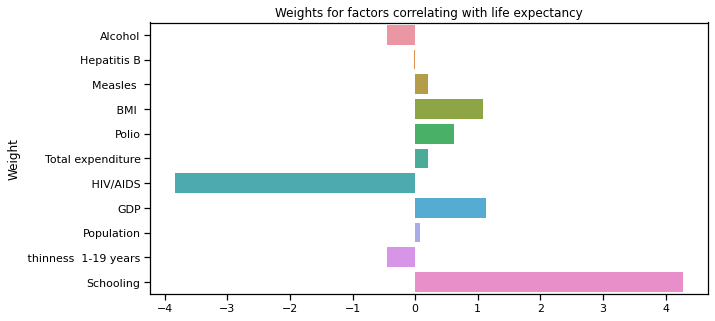

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with life expectancy")
plt.ylabel('Weight')
plt.show()

Does this make sense?

Evaluate $ R^2 $:

In [31]:
results_standardized.rsquared

0.7630369259261873

Now let's take a look at the summary:

In [32]:
results_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     479.2
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:01:31   Log-Likelihood:                -4737.7
No. Observations:                1649   AIC:                             9499.
Df Residuals:                    1637   BIC:                             9564.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    69.3023      0.106    654.994      0.000      69.095      69.510
Alcohol                  -0.4458      0.142     -3.148      0.002      -0.724      -0.168
Hepatitis B              -0.0106      0.122     -0.087      0.930      -0.249       0.228
Measles                   0.2086      0.114      1.836      0.066      -0.014       0.431
 BMI                      1.0813      0.139      7.791      0.000       0.809       1.354
Polio                     0.6187      0.125      4.946      0.000       0.373       0.864
Total expenditure         0.2077      0.111      1.863      0.063      -0.011       0.426
 HIV/AIDS                -3.8279      0.112    -34.321      0.000      -4.047      -3.609
GDP                       1.1334      0.124      9.172      0.000       0.891       1.376
Population                0.0731      0.117      0.623      0.533      -0.157       0.303
 thinness  1-19 years    -0.4569      0.140     -3.259      0.001      -0.732      -0.182
Schooling                 4.2723      0.165     25.933      0.000       3.949       4.595
==============================================================================
Omnibus:                       19.735   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.292
Skew:                          -0.193   Prob(JB):                     8.76e-06
Kurtosis:                       3.436   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What should we tell the King are likely some areas that generally affect life expectancy throughout the world?

In future lectures: 
- inference vs prediction.
- building regression models that perform well in prediction.
- using categorical variables as features in a regression.
    
